In [1]:
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')

In [2]:
from geom3d.train_models import *
import torch
import copy

config_dir = os.getcwd()+"/training/Equiformer_target_1K_TEST_5e4lr/"
config = read_config(config_dir)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/Equiformer_target_1K_TEST_5e4lr/


In [3]:
# Check if GPU is available
if torch.cuda.is_available():
    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)  # Assuming you have one GPU; you can change the index if you have multiple GPUs
    print(f"GPU ({gpu_name}) is available.")
else:
    print("No GPU available. Using CPU.")

GPU (Quadro RTX 6000) is available.


In [4]:
import importlib
from geom3d import train_models

importlib.reload(train_models)

config["device"] = "cuda:0" if torch.cuda.is_available() else "cpu"
    
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])
dataset = train_models.load_data(config)
print(f"length of dataset: {len(dataset)}")

length of dataset: 500


In [5]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cyprienbone. Use `wandb login --relogin` to force relogin


True

In [9]:
import importlib
from geom3d import train_models

importlib.reload(train_models)
train_models.main("/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/Equiformer_target_1K_TEST_5e4lr/")

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/Equiformer_target_1K_TEST_5e4lr/


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/torch/jit/_check.py:178: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Model loaded:  Equiformer
train_idx:  [361  73 374 155 104 394 377 124  68 450   9 194 406  84 371 388 495  30
 316 408 490 491 280 356  76 461 497 211 101 334 475 336 440 173   2 333
 409  70 209  63 384  93 485 185  33  77   0  11 415  22  72 182 131 410
 193  55 148  18 204  78 494 262 323 483  79  39 451  46 238 391 352 341
 277 290 317 304 268  69 455 465 154  82 477 172 321  90 180 414 312 278
 381 472 362 324 431 347  86  75 438  15 249 433  19 322 332  56 301 229
 331 132 137 423 335  25 464 281 247 237 117  42 220 176 320 153 231 227
 417 203 126 329  31 113 470 271 140  57 192  24  17 265  66 208 479  94
 253 266  23 222 261 426   5 116  45  16 462 357   3 218 405  60 110 318
 428  29 437 471  26   7 453 108  37 157 489 118 114 175 373 181 144 369
 390 195 404 275 454 141 365  67 210 168 493 375 400 272 109 248 145  92
 152 367 467  83 245 165 163 199 228  74 478 358 250 119 310 299 255 354
 399 225 353 234 382 274  36 196 139 364 244 439 286  59 111  89 436   6
 360 346 338 

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [2]:
%matplotlib inline

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr/
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr/epoch=99-val_loss=0.58-other_metric=0.00.ckpt
y_true tensor(-8.7690)
y_pred_cpu tensor([[-9.7815]], grad_fn=<AddmmBackward0>)
y_pred tensor([[-8.5345]], device='cuda:0', grad_fn=<AddmmBackward0>)
train_idx:  [47044 44295 74783 ... 77925 18116 14762]
valid_idx:  [39698 66692  7139 ... 52300 56176  3346]
test_idx:  [61260 28261 49228 ... 76820   860 15795]
pymodel device cuda:0


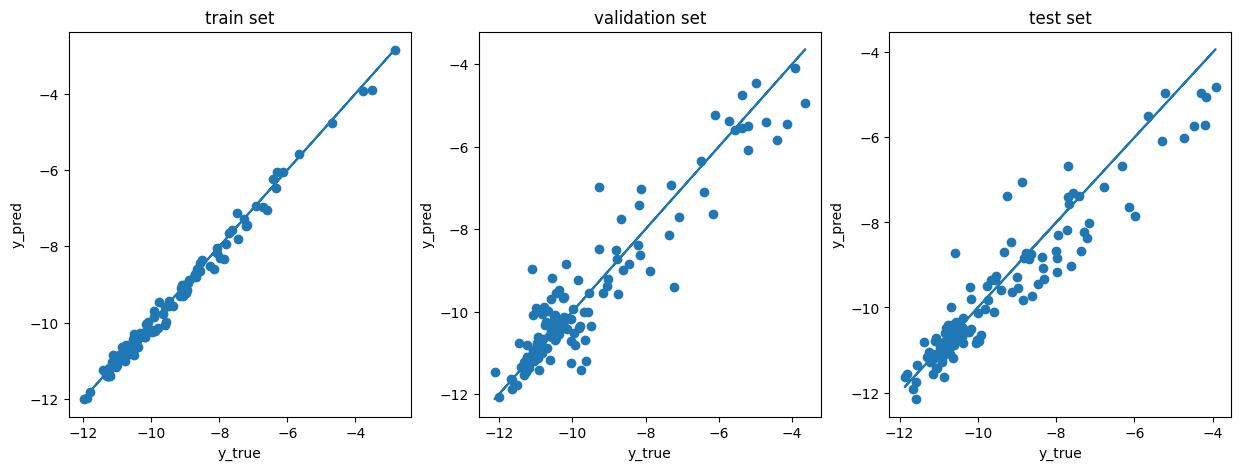

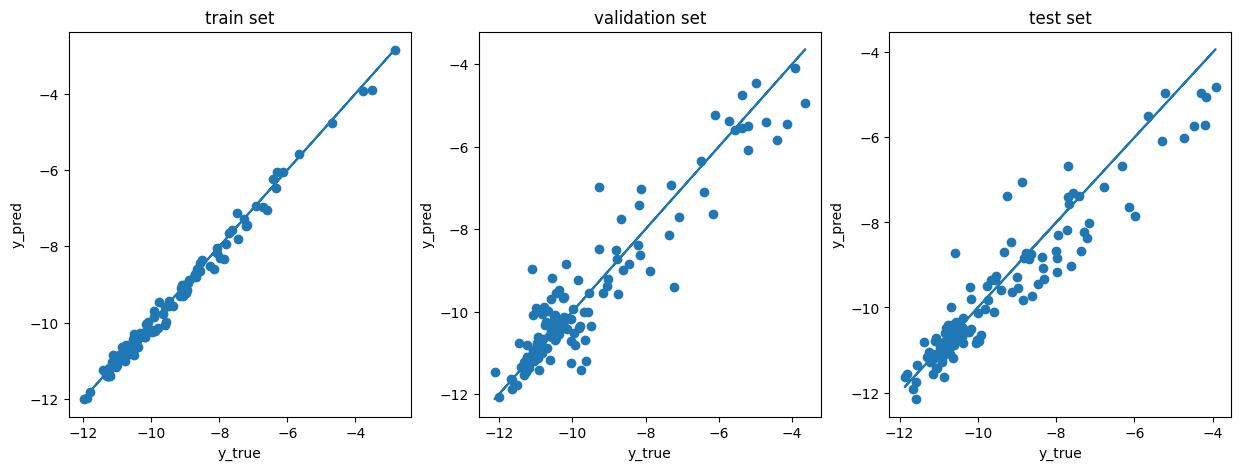

<Figure size 640x480 with 0 Axes>

In [3]:
import importlib
from geom3d.inference_tests import inference_test_SchNet

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr/"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/SchNet_target_80K_TEST_5e4lr/epoch=99-val_loss=0.58-other_metric=0.00.ckpt"

importlib.reload(inference_test_SchNet)
inference_test_SchNet.plot_training_results(chkpt_path, config_dir)

#issue related to the fact that the model is not saved in the checkpoint? or why is there no model.pth, graph_pred_linear.pth?